In [59]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

In [94]:
df = pd.read_csv('data/woolworths.csv')

In [95]:
len(df)

155

In [85]:
df.head()

,author_follower_count,author_friends_count,author_listed_count,author_favourites_count,user,author_screen_name,author_location,author_created_at,full_text,length,...,user_mentions,num_user_mentions,source,retweet_count,favorite_count,geo,coordinates,place,contributors,search_term
0,4404,4727,15,65140,J. A. Martin,Ghostsofthe812,"Evansville, IN",2015-08-26 22:39:40,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,"TIM,Deidre Lovell LUGZ @Parachills Ltd,Diane R...",8,Twitter Web App,1,0,NaN,NaN,NaN,NaN,costco australia
1,619,496,0,15215,Deidre Lovell LUGZ @Parachills Ltd,deidre_lovell,"Melbourne, Victoria",2020-09-07 01:37:14,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,"TIM,Deidre Lovell LUGZ @Parachills Ltd,Diane R...",8,Twitter for Android,1,0,NaN,NaN,NaN,NaN,costco australia
2,481,343,1,12186,TIM,_badrick,"Queensland, Australia",2020-07-10 11:28:35,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,"Deidre Lovell LUGZ @Parachills Ltd,Diane Richm...",7,Twitter for Android,1,2,NaN,NaN,NaN,NaN,costco australia
3,481,343,1,12186,TIM,_badrick,"Queensland, Australia",2020-07-10 11:28:35,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,"Deidre Lovell LUGZ @Parachills Ltd,Diane Richm...",7,Twitter for Android,1,3,NaN,NaN,NaN,NaN,costco australia
4,619,496,0,15215,Deidre Lovell LUGZ @Parachills Ltd,deidre_lovell,"Melbourne, Victoria",2020-09-07 01:37:14,@_badrick @Diane_Dee @abcnews @CrucibleRefuge ...,1,...,"TIM,Diane Richmond,ABC News,Crucible Refuge(De...",7,Twitter for Android,0,3,NaN,NaN,Place(_api=<tweepy.api.API object at 0x0000023...,NaN,costco australia


In [60]:
for i in df['full_text'].unique():
    print(i)

In [63]:
classifier = pipeline('sentiment-analysis', model='cardiffnlp/twitter-roberta-base-sentiment')

In [96]:
sent = {'LABEL_0': 'negative', 'LABEL_1': 'neutral', 'LABEL_2': 'positive'}

res = classifier(list(df['full_text']))
df['sentiment_prediction'] = [sent[i['label']] for i in res]
df['confidence'] = [i['score'] for i in res]

In [65]:
res

[{'label': 'LABEL_2', 'score': 0.9498805403709412},
 {'label': 'LABEL_1', 'score': 0.934985876083374},
 {'label': 'LABEL_2', 'score': 0.9543284773826599},
 {'label': 'LABEL_1', 'score': 0.5423856377601624},
 {'label': 'LABEL_0', 'score': 0.7822267413139343},
 {'label': 'LABEL_1', 'score': 0.8861303329467773},
 {'label': 'LABEL_2', 'score': 0.7404446005821228},
 {'label': 'LABEL_0', 'score': 0.5940235257148743},
 {'label': 'LABEL_2', 'score': 0.8857830166816711},
 {'label': 'LABEL_1', 'score': 0.4939860999584198},
 {'label': 'LABEL_0', 'score': 0.8025273680686951},
 {'label': 'LABEL_2', 'score': 0.5685312151908875},
 {'label': 'LABEL_2', 'score': 0.9205380082130432},
 {'label': 'LABEL_2', 'score': 0.89130038022995},
 {'label': 'LABEL_2', 'score': 0.8881169557571411},
 {'label': 'LABEL_1', 'score': 0.8877589702606201},
 {'label': 'LABEL_0', 'score': 0.5729892253875732},
 {'label': 'LABEL_1', 'score': 0.8579875826835632},
 {'label': 'LABEL_1', 'score': 0.6385806202888489},
 {'label': 'LAB

In [69]:
df['confidence'] = [i['score'] for i in res]

In [131]:
print(df.iloc()[3]['full_text'])

🙏Don't Ignore, Focus and course correct it right now.

#Apple #Microsoft #Amazon #Tesla #alibaba #visa #Walmart #Woolworths #HPE #Dell #HSBC #Target #ANZ #BHP #JPMorgan #CNN #ABC #7News #SBS #9News #CNBC #BBC #India #TheGuardian #UK #Australia  


In [87]:
df.head()

,author_follower_count,author_friends_count,author_listed_count,author_favourites_count,user,author_screen_name,author_location,author_created_at,full_text,length,...,source,retweet_count,favorite_count,geo,coordinates,place,contributors,search_term,sentiment_prediction,confidence
0,4404,4727,15,65140,J. A. Martin,Ghostsofthe812,"Evansville, IN",2015-08-26 22:39:40,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,Twitter Web App,1,0,NaN,NaN,NaN,NaN,costco australia,negative,0.676967
1,619,496,0,15215,Deidre Lovell LUGZ @Parachills Ltd,deidre_lovell,"Melbourne, Victoria",2020-09-07 01:37:14,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,Twitter for Android,1,0,NaN,NaN,NaN,NaN,costco australia,neutral,0.539287
2,481,343,1,12186,TIM,_badrick,"Queensland, Australia",2020-07-10 11:28:35,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,Twitter for Android,1,2,NaN,NaN,NaN,NaN,costco australia,neutral,0.539287
3,481,343,1,12186,TIM,_badrick,"Queensland, Australia",2020-07-10 11:28:35,@deidre_lovell @Diane_Dee @abcnews @CrucibleRe...,1,...,Twitter for Android,1,3,NaN,NaN,NaN,NaN,costco australia,negative,0.676967
4,619,496,0,15215,Deidre Lovell LUGZ @Parachills Ltd,deidre_lovell,"Melbourne, Victoria",2020-09-07 01:37:14,@_badrick @Diane_Dee @abcnews @CrucibleRefuge ...,1,...,Twitter for Android,0,3,NaN,NaN,Place(_api=<tweepy.api.API object at 0x0000023...,NaN,costco australia,negative,0.761194


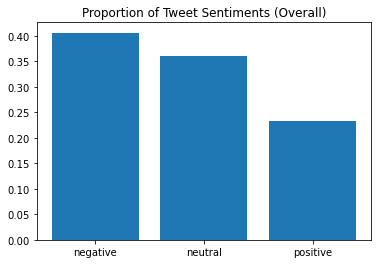

In [97]:
# print(sum(sum([df['sentiment_prediction'] == 'negative']))/len(df))
# print(sum(sum([df['sentiment_prediction'] == 'neutral']))/len(df))
# print(sum(sum([df['sentiment_prediction'] == 'positive']))/len(df))

plt.bar(['negative', 'neutral', 'positive'], [sum(sum([df['sentiment_prediction'] == 'negative']))/len(df), sum(sum([df['sentiment_prediction'] == 'neutral']))/len(df),sum(sum([df['sentiment_prediction'] == 'positive']))/len(df)])
plt.title('Proportion of Tweet Sentiments (Overall)')
plt.show()

In [19]:
df_woolies = df[df['search_term']=='woolworths australia']

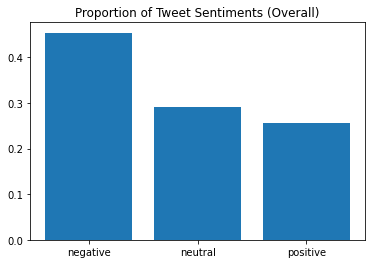

In [21]:
plt.bar(['negative', 'neutral', 'positive'], [sum(sum([df_woolies['sentiment_prediction'] == 'negative']))/len(df_woolies), sum(sum([df_woolies['sentiment_prediction'] == 'neutral']))/len(df_woolies),sum(sum([df_woolies['sentiment_prediction'] == 'positive']))/len(df_woolies)])
plt.title('Proportion of Tweet Sentiments (Woolworths)')
plt.show()

In [27]:
df.columns

Index(['author_follower_count', 'author_friends_count', 'author_listed_count',
       'author_favourites_count', 'user', 'author_screen_name',
       'author_location', 'author_created_at', 'full_text', 'length',
       'created_at', 'hashtags', 'user_mentions', 'num_user_mentions',
       'source', 'retweet_count', 'favorite_count', 'geo', 'coordinates',
       'place', 'contributors', 'search_term', 'sentiment_prediction'],
      dtype='object')

In [28]:
df['author_location'].unique()

array([nan, 'Melbourne, Victoria', 'Australia', 'Wollongong, Australia',
       'İstanbul, Türkiye', 'Research Triangle Park, NC', 'Tennessee, !',
       'Lakebay, WA, USA', 'Chandigarh, India', 'Brisbane, Queensland',
       'South Africa', 'Prahran, Melbourne', 'A.S.I.A', 'Newtown, Sydney',
       'Melbourne', 'Canberra', 'Singapore',
       'Yosemite in the Blue Mountains', 'Worldwide',
       'Sydney, New South Wales', 'Global', 'Pacific & East Antarctica',
       'progressive political hopeland', 'Victoria',
       'Auckland, New Zealand', 'Melbourne Australia',
       'Sunshine Coast, Queensland', 'Santa Pod, UK', 'Mexico',
       'Kraków, Polska', 'Houston, TX', 'New York City',
       'Toronto, Ontario', 'East Yorkshire, England',
       'Driffield, England', 'England, United Kingdom',
       'Newcastle, New South Wales', 'Blackburn, Melbourne', 'Sydney',
       'Bunurong Country', 'Darwin, Northern Territory',
       'Highways of Australia', 'Mornington Peninsula Melbourne',
 

In [22]:
import string

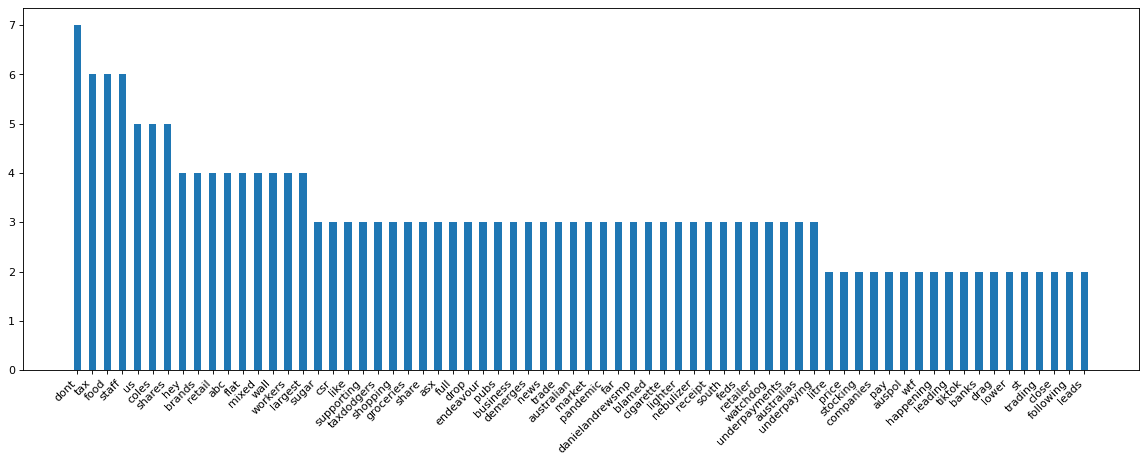

[('woolworths', 32), ('australia', 23), ('dont', 7), ('tax', 6), ('food', 6), ('staff', 6), ('us', 5), ('coles', 5), ('shares', 5), ('hey', 4), ('brands', 4), ('retail', 4), ('abc', 4), ('flat', 4), ('mixed', 4), ('wall', 4), ('workers', 4), ('largest', 4), ('sugar', 3), ('csr', 3), ('like', 3), ('supporting', 3), ('taxdodgers', 3), ('shopping', 3), ('groceries', 3), ('share', 3), ('asx', 3), ('full', 3), ('drop', 3), ('endeavour', 3), ('pubs', 3), ('business', 3), ('demerges', 3), ('news', 3), ('trade', 3), ('australian', 3), ('market', 3), ('pandemic', 3), ('far', 3), ('danielandrewsmp', 3), ('blamed', 3), ('cigarette', 3), ('lighter', 3), ('nebulizer', 3), ('receipt', 3), ('south', 3), ('feds', 3), ('retailer', 3), ('watchdog', 3), ('underpayments', 3)]


In [113]:
import nltk
from nltk.corpus import stopwords

plt.figure(figsize=(18, 6), dpi=80)

data = ' '.join([re.sub('#','',re.sub('@','',i)) for i in list(df[df['sentiment_prediction'] == 'negative']['full_text'].unique())]).replace('\n', ' ').replace('\\\'t', 't').replace('\\\'s', 's').translate(str.maketrans('', '', string.punctuation)).lower()
data = data.split(' ')

stop_words = stopwords.words('english')

filtered_data = [w for w in data if not w.lower() in stop_words]
filtered_data = [word.lower() for word in filtered_data if word.isalpha()]

fdist2 = nltk.FreqDist(filtered_data)

words, freqs = map(list, zip(*fdist2.most_common(70)))

plt.bar(words[2:], freqs[2:], width=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()
print (fdist2.most_common(50))

In [133]:
# print(' '.join([i for i in [i for i in filtered_data if i != 'australia'] if i != 'woolworths']))

In [74]:
df.head()

,author_follower_count,author_friends_count,author_listed_count,author_favourites_count,user,author_screen_name,author_location,author_created_at,full_text,length,...,source,retweet_count,favorite_count,geo,coordinates,place,contributors,search_term,sentiment_prediction,confidence
0,18,146,0,10,Sabrina hill,Sabrina46554824,United States,2021-06-08 06:08:04,Woolworths gift card code for Australia.#Woolw...,1,...,Twitter Web App,0,1,NaN,NaN,NaN,NaN,costco australia,positive,0.949881
1,760,0,5,1,PFD Bot,pfdbot,"Anchorage, AK",2017-09-08 05:07:29,"Alaskans own 119,227 shares of Woolworths Grou...",1,...,pfdbot,0,0,NaN,NaN,NaN,NaN,costco australia,neutral,0.934986
2,2062,1715,55,10089,David Inderias,d_inderias,"Brisbane, Queensland",2017-01-16 04:58:45,@Mryoungy87 @woolworths @applesnpearsAU @Fresh...,1,...,Twitter for iPhone,0,0,NaN,NaN,Place(_api=<tweepy.api.API object at 0x0000023...,NaN,costco australia,positive,0.954328
3,62,393,2,542,Donna Dormitorio,DonnaDorm,NaN,2014-09-05 07:24:53,Supermarkets will remain open during a lockdow...,1,...,Twitter for iPhone,0,0,NaN,NaN,NaN,NaN,costco australia,neutral,0.542386
4,191,265,25,1044,ConsumerWorld,ConsumerHat,progressive political hopeland,2009-01-29 18:45:45,Hey @woolworths how about stocking some other ...,1,...,Twitter for Android,1,0,NaN,NaN,NaN,NaN,costco australia,negative,0.782227


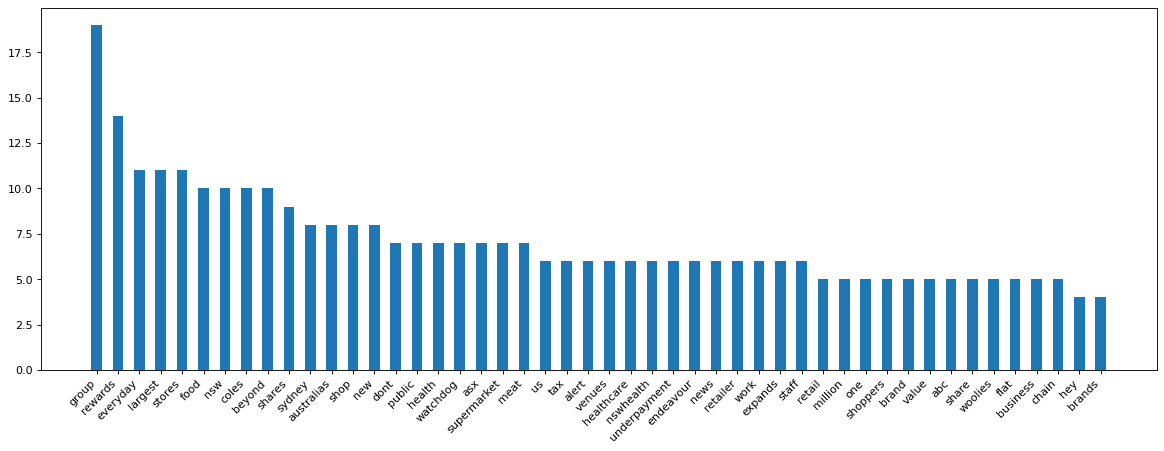

[('woolworths', 96), ('australia', 78), ('group', 19), ('rewards', 14), ('everyday', 11), ('largest', 11), ('stores', 11), ('food', 10), ('nsw', 10), ('coles', 10), ('beyond', 10), ('shares', 9), ('sydney', 8), ('australias', 8), ('shop', 8), ('new', 8), ('dont', 7), ('public', 7), ('health', 7), ('watchdog', 7), ('asx', 7), ('supermarket', 7), ('meat', 7), ('us', 6), ('tax', 6), ('alert', 6), ('venues', 6), ('healthcare', 6), ('nswhealth', 6), ('underpayment', 6), ('endeavour', 6), ('news', 6), ('retailer', 6), ('work', 6), ('expands', 6), ('staff', 6), ('retail', 5), ('million', 5), ('one', 5), ('shoppers', 5), ('brand', 5), ('value', 5), ('abc', 5), ('share', 5), ('woolies', 5), ('flat', 5), ('business', 5), ('chain', 5), ('hey', 4), ('brands', 4)]


In [78]:
import nltk
from nltk.corpus import stopwords

plt.figure(figsize=(18, 6), dpi=80)

data = ' '.join([re.sub('#','',re.sub('@','',i)) for i in list(df['full_text'].unique())]).replace('\n', ' ').replace('\\\'t', 't').replace('\\\'s', 's').translate(str.maketrans('', '', string.punctuation)).lower()
data = data.split(' ')

stop_words = stopwords.words('english')

filtered_data = [w for w in data if not w.lower() in stop_words]
filtered_data = [word.lower() for word in filtered_data if word.isalpha()]

fdist2 = nltk.FreqDist(filtered_data)

words, freqs = map(list, zip(*fdist2.most_common(50)))

plt.bar(words[2:], freqs[2:], width=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()
print (fdist2.most_common(50))

In [111]:
# print(' '.join(list(df['full_text'])))